In [0]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn

In [0]:
# from google.colab import files 
# uploaded = files.upload()
# manual way to upload local files to google colab

Mounting google drive

In [0]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount = True)

# root_dir = '/content/drive/My Drive/'
# base_dir = '/content/drive/My Drive/Deep_Learning_Projects'

Changing current working directory

In [4]:
%cd /content/drive/My\ Drive/Deep_Learning_Projects/ImageNet

/content/drive/My Drive/Deep_Learning_Projects/ImageNet


In [5]:
!pwd

/content/drive/My Drive/Deep_Learning_Projects/ImageNet


In [6]:
!ls

Datasets


In [0]:
import torchvision
import torchvision.transforms as transforms

In [8]:
trainset = torchvision.datasets.CIFAR10(root='./Datasets', train=True, 
                                        download=True, 
                                        transform=transforms.ToTensor())

Files already downloaded and verified


In [0]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [0]:
trainset?

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4, shuffle = True)

In [15]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)

print(images[1].shape)
print(labels[1].item())

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
3


In [16]:
type(images[1])

torch.Tensor

In [18]:
npimg = images[1].numpy()
print(npimg.shape)

(3, 32, 32)


In [19]:
npimg = np.transpose(npimg, (1, 2, 0))
print(npimg.shape)

(32, 32, 3)


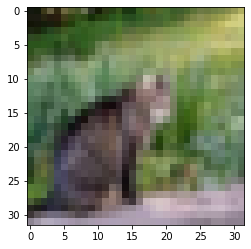

In [23]:
plt.imshow(npimg)
plt.show()

In [0]:
class FirstCnn(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3, 6, 5),  #(N, 3, 32, 32) -> (N, 6, 28, 28)
        nn.AvgPool2d(2, stride=2), #(N, 6, 28, 28) -> (N, 6, 14, 14)
        nn.Conv2d(6, 16, 5),
        nn.AvgPool2d(2, stride=2)
    )

  def forward(self, x):
    x = self.model(x)
    return x  

In [34]:
net = FirstCnn()
out_img = net(images)
print(out_img.shape)

torch.Size([4, 16, 5, 5])


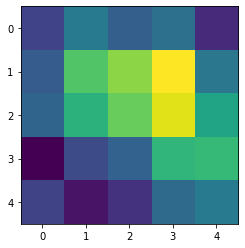

In [35]:
plt.imshow(out_img[0, 0, :, :].detach().numpy())
plt.show()